INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

REGRESIÓN LINEAL SIMPLE (Private Room)

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
07/10/2024

# Librería y carga de Archivo

In [66]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [68]:
# Antes de dividir el dataframe, observamos los valores numéricos de la columna catégorica "room_type"
df[["room_type","room_type_num"]].value_counts()

room_type        room_type_num
Entire home/apt  0                1759
Private room     1                1096
Shared room      2                   7
Name: count, dtype: int64

In [69]:
# Fragmentamos el dataframe solo con las variables a analizar

df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [70]:
df1["review_scores_location"]

0       5
1       5
2       5
3       5
4       5
       ..
2857    5
2858    5
2859    5
2860    5
2861    5
Name: review_scores_location, Length: 2862, dtype: int64

In [71]:
# Corroboramos
df1["room_type_num"].value_counts()

room_type_num
0    1759
1    1096
2       7
Name: count, dtype: int64

# Dividir el dataframe según el tipo de habitación

## Private room | 1

In [72]:
dfHome = df1[df1["room_type_num"] == 1]
dfHome

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,96.0,100.0,5,5,74,0,9,0.12,5,0
6,1,100.0,100.0,5,5,45,338,15,0.21,5,0
7,1,87.5,94.8,5,5,75,90,7,0.05,5,0
12,1,100.0,100.0,5,5,36,212,47,0.36,5,3
14,1,100.0,100.0,5,5,41,294,41,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...
2852,1,94.0,100.0,5,5,74,267,1,1.00,5,1
2855,1,97.0,100.0,5,5,71,267,0,1.16,5,0
2856,1,97.0,100.0,5,5,79,266,0,1.16,5,0
2857,1,100.0,100.0,5,5,60,85,0,1.16,5,0


### Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

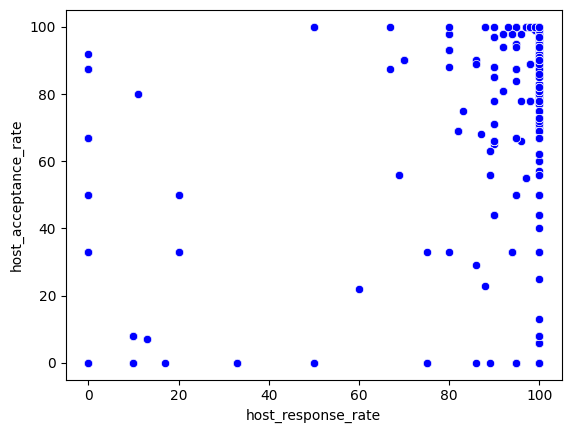

In [73]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [74]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome[["host_acceptance_rate"]] # Dependiente = y

In [75]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [77]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.52210907]]),
 'rank_': 1,
 'singular_': array([614.46731022]),
 'intercept_': array([35.61599568])}

**Modelo Matemático: y = 0.52210907x + 35.61599568**

In [78]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome[['host_response_rate']])
y_pred

array([[87.82690318],
       [87.82690318],
       [85.11193599],
       ...,
       [87.82690318],
       [87.82690318],
       [87.82690318]])

In [79]:
# Insertamos la columna de preddiciones en el df
dfHome.insert(2, 'Predict1', y_pred)
dfHome

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,96.0,87.826903,100.0,5,5,74,0,9,0.12,5,0
6,1,100.0,87.826903,100.0,5,5,45,338,15,0.21,5,0
7,1,87.5,85.111936,94.8,5,5,75,90,7,0.05,5,0
12,1,100.0,87.826903,100.0,5,5,36,212,47,0.36,5,3
14,1,100.0,87.826903,100.0,5,5,41,294,41,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,94.0,87.826903,100.0,5,5,74,267,1,1.00,5,1
2855,1,97.0,87.826903,100.0,5,5,71,267,0,1.16,5,0
2856,1,97.0,87.826903,100.0,5,5,79,266,0,1.16,5,0
2857,1,100.0,87.826903,100.0,5,5,60,85,0,1.16,5,0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

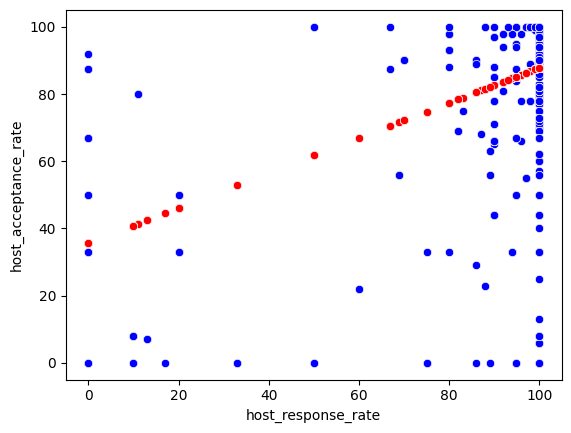

In [80]:
# Gráfica de comparación
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome)

In [81]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.15818594060470337

In [82]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.39772596169310265

### Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

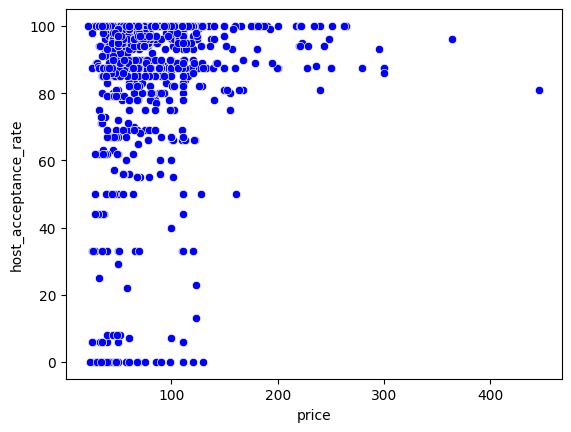

In [83]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [84]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["price"]]
Var_Dep = dfHome[["host_acceptance_rate"]]

In [85]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.05909876]]),
 'rank_': 1,
 'singular_': array([1490.92168133]),
 'intercept_': array([79.99297552])}

**Modelo Matemático: y = 0.05909876x + 79.99297552**

In [86]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(8, 'Predict2', y_pred)
dfHome

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,96.0,87.826903,100.0,5,5,74,0,84.366283,9,0.12,5,0
6,1,100.0,87.826903,100.0,5,5,45,338,82.652420,15,0.21,5,0
7,1,87.5,85.111936,94.8,5,5,75,90,84.425382,7,0.05,5,0
12,1,100.0,87.826903,100.0,5,5,36,212,82.120531,47,0.36,5,3
14,1,100.0,87.826903,100.0,5,5,41,294,82.416024,41,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,94.0,87.826903,100.0,5,5,74,267,84.366283,1,1.00,5,1
2855,1,97.0,87.826903,100.0,5,5,71,267,84.188987,0,1.16,5,0
2856,1,97.0,87.826903,100.0,5,5,79,266,84.661777,0,1.16,5,0
2857,1,100.0,87.826903,100.0,5,5,60,85,83.538901,0,1.16,5,0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

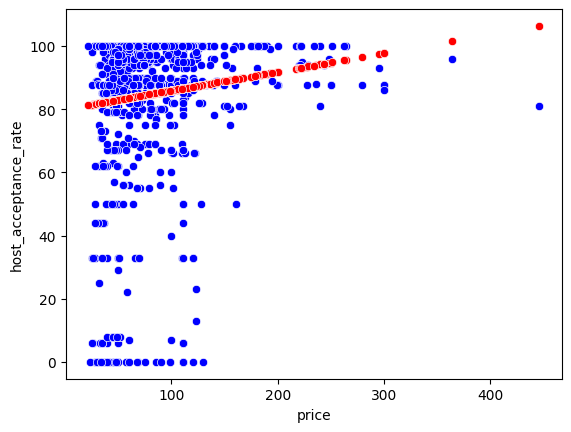

In [87]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome)

In [88]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.10923380965924881

### Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

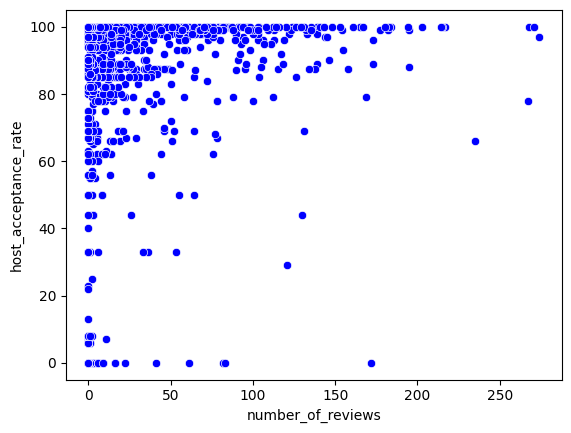

In [89]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [90]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews"]]
Var_Dep = dfHome[["host_acceptance_rate"]]

In [91]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.10494887]]),
 'rank_': 1,
 'singular_': array([1416.8471063]),
 'intercept_': array([81.77341881])}

**Modelo Matemático y = 0.10494887x + 81.77341881**

In [92]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(1, 'Predict3', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,82.717959,96.0,87.826903,100.0,5,5,74,0,84.366283,9,0.12,5,0
6,1,83.347652,100.0,87.826903,100.0,5,5,45,338,82.652420,15,0.21,5,0
7,1,82.508061,87.5,85.111936,94.8,5,5,75,90,84.425382,7,0.05,5,0
12,1,86.706016,100.0,87.826903,100.0,5,5,36,212,82.120531,47,0.36,5,3
14,1,86.076322,100.0,87.826903,100.0,5,5,41,294,82.416024,41,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,81.878368,94.0,87.826903,100.0,5,5,74,267,84.366283,1,1.00,5,1
2855,1,81.773419,97.0,87.826903,100.0,5,5,71,267,84.188987,0,1.16,5,0
2856,1,81.773419,97.0,87.826903,100.0,5,5,79,266,84.661777,0,1.16,5,0
2857,1,81.773419,100.0,87.826903,100.0,5,5,60,85,83.538901,0,1.16,5,0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

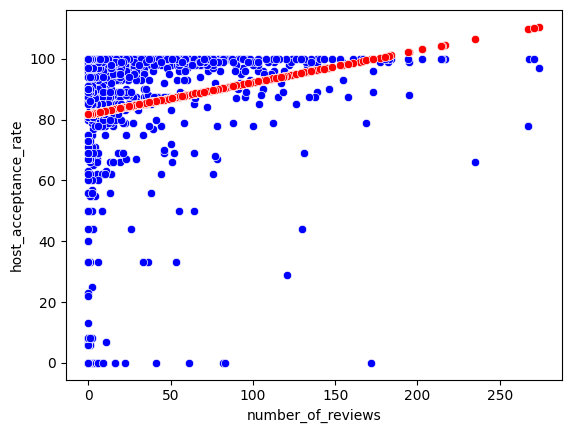

In [93]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome)

In [94]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.18434215764080703

### Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

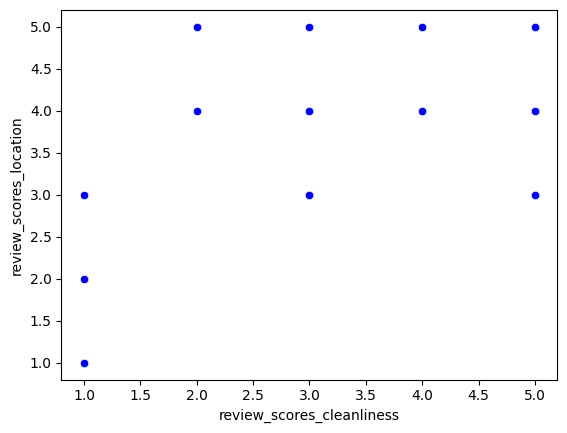

In [95]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [96]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_cleanliness"]]
Var_Dep = dfHome[["review_scores_location"]]

In [97]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.43486633]]),
 'rank_': 1,
 'singular_': array([14.04008859]),
 'intercept_': array([2.78200215])}

**Modelo Matemático: y = 0.43486633x + 2.78200215**

In [98]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(6, 'Predict4', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,82.717959,96.0,87.826903,100.0,5,4.956334,5,74,0,84.366283,9,0.12,5,0
6,1,83.347652,100.0,87.826903,100.0,5,4.956334,5,45,338,82.652420,15,0.21,5,0
7,1,82.508061,87.5,85.111936,94.8,5,4.956334,5,75,90,84.425382,7,0.05,5,0
12,1,86.706016,100.0,87.826903,100.0,5,4.956334,5,36,212,82.120531,47,0.36,5,3
14,1,86.076322,100.0,87.826903,100.0,5,4.956334,5,41,294,82.416024,41,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,81.878368,94.0,87.826903,100.0,5,4.956334,5,74,267,84.366283,1,1.00,5,1
2855,1,81.773419,97.0,87.826903,100.0,5,4.956334,5,71,267,84.188987,0,1.16,5,0
2856,1,81.773419,97.0,87.826903,100.0,5,4.956334,5,79,266,84.661777,0,1.16,5,0
2857,1,81.773419,100.0,87.826903,100.0,5,4.956334,5,60,85,83.538901,0,1.16,5,0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

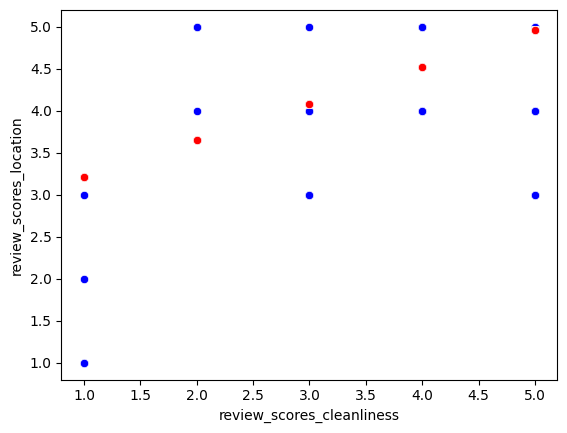

In [99]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome)

In [100]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.514996505187287

### Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

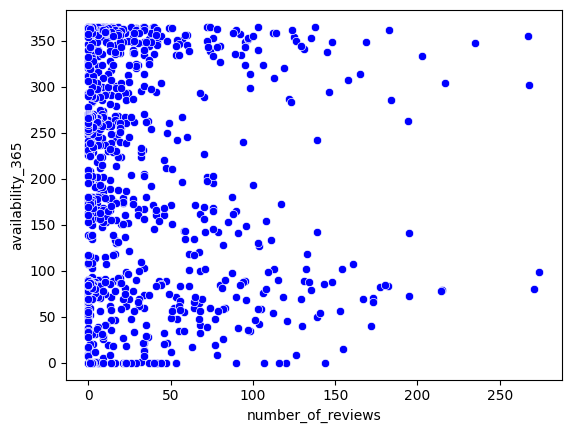

In [101]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [102]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews"]]
Var_Dep = dfHome[["availability_365"]]

In [103]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.34839272]]),
 'rank_': 1,
 'singular_': array([1416.8471063]),
 'intercept_': array([220.29833037])}

**Modelo Matemático: y = -0.34839272x + 220.29833037**

In [104]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(7, 'Predict5', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,82.717959,96.0,87.826903,100.0,5,4.956334,217.162796,5,74,0,84.366283,9,0.12,5,0
6,1,83.347652,100.0,87.826903,100.0,5,4.956334,215.072440,5,45,338,82.652420,15,0.21,5,0
7,1,82.508061,87.5,85.111936,94.8,5,4.956334,217.859581,5,75,90,84.425382,7,0.05,5,0
12,1,86.706016,100.0,87.826903,100.0,5,4.956334,203.923873,5,36,212,82.120531,47,0.36,5,3
14,1,86.076322,100.0,87.826903,100.0,5,4.956334,206.014229,5,41,294,82.416024,41,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,81.878368,94.0,87.826903,100.0,5,4.956334,219.949938,5,74,267,84.366283,1,1.00,5,1
2855,1,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,71,267,84.188987,0,1.16,5,0
2856,1,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,79,266,84.661777,0,1.16,5,0
2857,1,81.773419,100.0,87.826903,100.0,5,4.956334,220.298330,5,60,85,83.538901,0,1.16,5,0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

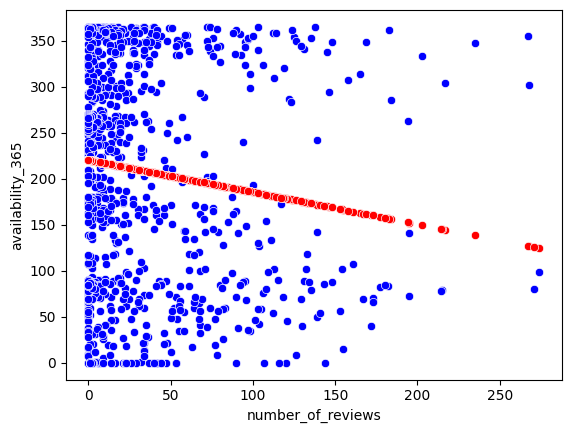

In [105]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome)

In [106]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.12486979193960797

### Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

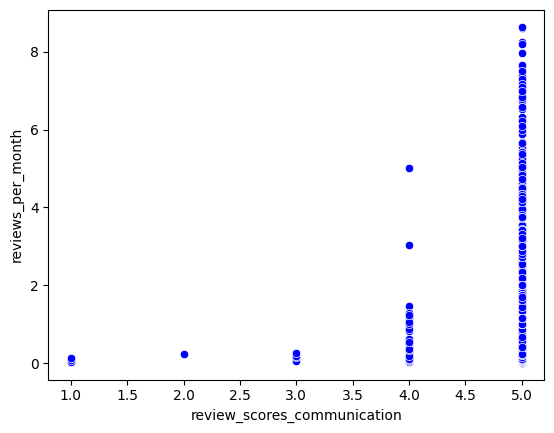

In [107]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [108]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_communication"]]
Var_Dep = dfHome[["reviews_per_month"]]

In [109]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.57811551]]),
 'rank_': 1,
 'singular_': array([11.57012103]),
 'intercept_': array([-1.40153682])}

**Modelo Matemático: y = 0.57811551x - 1.40153682**

In [110]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(13, 'Predict6', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,82.717959,96.0,87.826903,100.0,5,4.956334,217.162796,5,74,0,84.366283,9,1.489041,0.12,5,0
6,1,83.347652,100.0,87.826903,100.0,5,4.956334,215.072440,5,45,338,82.652420,15,1.489041,0.21,5,0
7,1,82.508061,87.5,85.111936,94.8,5,4.956334,217.859581,5,75,90,84.425382,7,1.489041,0.05,5,0
12,1,86.706016,100.0,87.826903,100.0,5,4.956334,203.923873,5,36,212,82.120531,47,1.489041,0.36,5,3
14,1,86.076322,100.0,87.826903,100.0,5,4.956334,206.014229,5,41,294,82.416024,41,1.489041,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,81.878368,94.0,87.826903,100.0,5,4.956334,219.949938,5,74,267,84.366283,1,1.489041,1.00,5,1
2855,1,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,71,267,84.188987,0,1.489041,1.16,5,0
2856,1,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,79,266,84.661777,0,1.489041,1.16,5,0
2857,1,81.773419,100.0,87.826903,100.0,5,4.956334,220.298330,5,60,85,83.538901,0,1.489041,1.16,5,0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

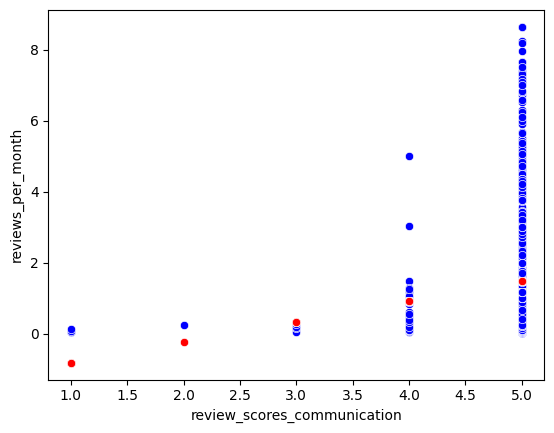

In [111]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome)

In [112]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_6 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_6 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_6 = np.sqrt(coef_Deter_6)
coef_Correl_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.13069801952672794

## Resumen

In [113]:
# Para el tipo de casa "Private room", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_1}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_2}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_3}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_4}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_5}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_6}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 0.39772596169310265
Filtro 2: 'host_acceptance_rate vs price': 0.10923380965924881
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.18434215764080703
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 0.514996505187287
Filtro 5: 'availability_365 vs number_of_reviews': 0.12486979193960797
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.13069801952672794


# Mejor modelo matemático simple

In [114]:
# Modelo usando las regresiones lineales
dfModel = dfHome[dfHome["room_type_num"] == 1]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,82.717959,96.0,87.826903,100.0,5,4.956334,217.162796,5,74,0,84.366283,9,1.489041,0.12,5,0
6,83.347652,100.0,87.826903,100.0,5,4.956334,215.072440,5,45,338,82.652420,15,1.489041,0.21,5,0
7,82.508061,87.5,85.111936,94.8,5,4.956334,217.859581,5,75,90,84.425382,7,1.489041,0.05,5,0
12,86.706016,100.0,87.826903,100.0,5,4.956334,203.923873,5,36,212,82.120531,47,1.489041,0.36,5,3
14,86.076322,100.0,87.826903,100.0,5,4.956334,206.014229,5,41,294,82.416024,41,1.489041,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,81.878368,94.0,87.826903,100.0,5,4.956334,219.949938,5,74,267,84.366283,1,1.489041,1.00,5,1
2855,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,71,267,84.188987,0,1.489041,1.16,5,0
2856,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,79,266,84.661777,0,1.489041,1.16,5,0
2857,81.773419,100.0,87.826903,100.0,5,4.956334,220.298330,5,60,85,83.538901,0,1.489041,1.16,5,0


In [115]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict5,1.000000
Predict3,1.000000
number_of_reviews,1.000000
reviews_per_month,0.553280
number_of_reviews_ltm,0.524547


<Axes: >

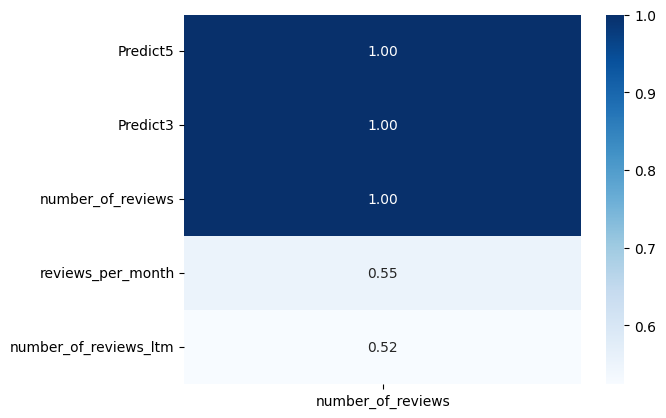

In [116]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [117]:
# Modelo original
df = df[df["room_type_num"] == 1]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
2,2401179,2012,1,5,1,1,45.405500,-75.676120,1.0,1,...,3,2,4,1,5,0.12,5,5,5,5
6,3894080,2012,0,1,1,1,45.348360,-75.628820,1.5,1,...,3,0,5,2,5,0.21,5,5,5,5
7,3895093,2012,0,1,1,1,45.417530,-75.692970,1.0,1,...,3,2,5,1,4,0.05,5,5,5,5
12,1755714,2012,1,8,1,1,45.347610,-75.784300,1.0,1,...,3,2,5,1,5,0.36,5,5,5,5
14,8713727,2013,1,3,1,1,45.322834,-75.601283,1.5,1,...,3,2,5,1,5,0.31,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,561050183,2024,0,5,1,1,45.352328,-75.615733,1.0,1,...,3,0,3,1,5,1.00,5,5,5,5
2855,486026361,2022,0,6,1,1,45.444763,-75.519346,1.5,1,...,3,0,3,1,5,1.16,5,5,5,5
2856,486026361,2022,0,6,1,1,45.444848,-75.519913,1.0,1,...,3,0,3,1,5,1.16,5,5,5,5
2857,104583371,2016,0,3,1,1,45.323071,-75.607969,1.0,1,...,3,2,4,1,5,1.16,5,5,5,5


In [118]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2


,number_of_reviews
number_of_reviews,1.000000
reviews_per_month,0.553280
number_of_reviews_ltm,0.524547
number_of_reviews_l30d,0.468181
minimum_nights_avg_ntm,0.274234
amenities_num,0.241335
host_is_superhost,0.202000


<Axes: >

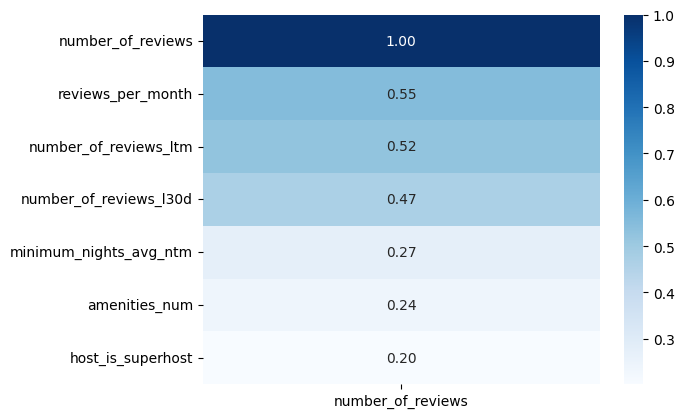

In [119]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='reviews_per_month', ylabel='number_of_reviews'>

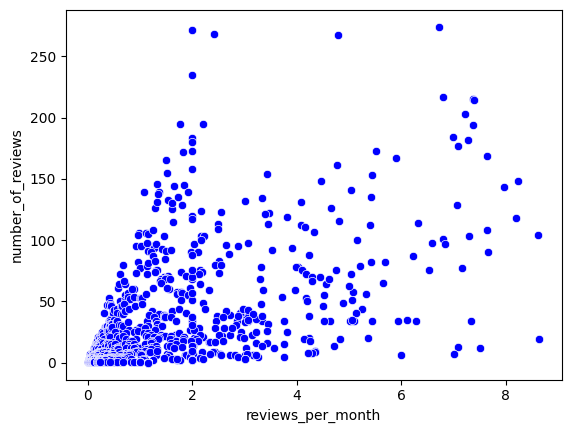

In [120]:
# Para este tipo de habitación "Private Room", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'reviews_per_month', y = 'number_of_reviews', color = 'blue', data = dfHome)

In [121]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["reviews_per_month"]]
Var_Dep = dfHome[["number_of_reviews"]]

In [122]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[15.31737759]]),
 'rank_': 1,
 'singular_': array([51.17802462]),
 'intercept_': array([5.40360806])}

**Modelo Matemático: y = 15.31737759x + 5.40360806**

In [123]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "reviews_per_month"
y_pred = model.predict(X = dfHome[['reviews_per_month']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(13, 'PredictFinal', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
2,1,82.717959,96.0,87.826903,100.0,5,4.956334,217.162796,5,74,0,84.366283,9,7.241693,1.489041,0.12,5,0
6,1,83.347652,100.0,87.826903,100.0,5,4.956334,215.072440,5,45,338,82.652420,15,8.620257,1.489041,0.21,5,0
7,1,82.508061,87.5,85.111936,94.8,5,4.956334,217.859581,5,75,90,84.425382,7,6.169477,1.489041,0.05,5,0
12,1,86.706016,100.0,87.826903,100.0,5,4.956334,203.923873,5,36,212,82.120531,47,10.917864,1.489041,0.36,5,3
14,1,86.076322,100.0,87.826903,100.0,5,4.956334,206.014229,5,41,294,82.416024,41,10.151995,1.489041,0.31,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,1,81.878368,94.0,87.826903,100.0,5,4.956334,219.949938,5,74,267,84.366283,1,20.720986,1.489041,1.00,5,1
2855,1,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,71,267,84.188987,0,23.171766,1.489041,1.16,5,0
2856,1,81.773419,97.0,87.826903,100.0,5,4.956334,220.298330,5,79,266,84.661777,0,23.171766,1.489041,1.16,5,0
2857,1,81.773419,100.0,87.826903,100.0,5,4.956334,220.298330,5,60,85,83.538901,0,23.171766,1.489041,1.16,5,0


<Axes: xlabel='reviews_per_month', ylabel='number_of_reviews'>

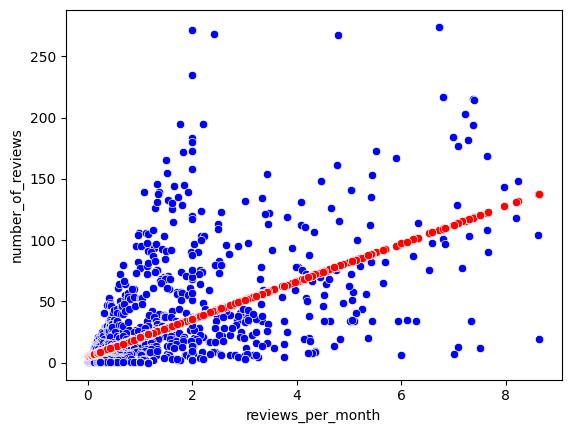

In [124]:
# Gráfica de comparación
sns.scatterplot(x = 'reviews_per_month', y = 'number_of_reviews', color = 'blue', data = dfHome)
sns.scatterplot(x = 'reviews_per_month', y = 'PredictFinal', color = "red", data = dfHome)

In [125]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5532799720402609